## Handling Missing Data, Loading and Plotting Data and Logistic Regression
-----

## Introduction 
##### In this lab, we will first see some basic way to handle missing data. 

##### Next, we will load a simple dataset and visualise its features in a two dimensional space. 

##### Finally, we will learn how to implement Logistic Regression (LR). This is a very important problem in machine learning and is applied to solve a variety of real life tasks. For example, financial services such as banks can rely on historical data of customers' credit record for loan approval by humans to automate the decision making process. A logistic regression model can be trained on these data, and then used to predict loan acceptance for future applicants. In particalar in this lab, you will apply Logistic Regression to predict survival on Titanic. 

### Objectives:
1. Revise fundamental concpets of LR and visualize the sigmoid function
4. Perform data pre-processing and preparation.  
5. Implement Logistic Regression with sklearn
6. Perform thresholding for selecting the optimum threshold
-----

## Part 1: Loading and Plotting Data



In this part, revisit the Iris dataset from week 1's lab (please see week 1's lab) and practice loading, visualizing, and interpreting data.

The dataset has 150 rows and four columns. 

Rows represent 150 samples of iris flowers. 

Columns represent four features of a flower: 

1. Column 0: Sepal length (in cm)
2. Column 1: Sepal width (in cm)
3. Column 2: Petal length (in cm)
4. Column 3: Petal width (in cm)


In [1]:

# Load the Iris dataset and plot sepal length vs sepal width
# Use matplotlib for plotting
# Write your observations based on the plot


## Part 2: Role of Data in AI


In AI, data is crucial for building accurate models. However, real-world data often contains issues such as missing values. It's essential to handle missing data properly to avoid inaccuracies in our models.

One common technique to handle missing data is to replace missing values with the mean (average) of the available data. This approach helps to maintain the dataset's overall structure without introducing bias from incomplete data.

In this part, you will practice handling missing data by replacing missing values with the mean.

You'll work with both a list of meaningful numbers and a matrix representing real-world data.

Let's get started!

But as you start, please note that np.nan represents a missing or undefined numerical value in a dataset. It stands for "Not a Number" and is commonly used to handle missing data in numerical arrays.


### Case 1: Handling Missing Values in a List (Real-World Example)


In [3]:
import numpy as np
# You are given a list of daily temperatures (in Celsius) over a month, with some missing values.

temperatures = [22, 24, np.nan, 19, 21, np.nan, 23, 25, np.nan, 20, 26, np.nan, 24, 23, np.nan, 22, 21, 24, 25, 26, 
                23, None, 22, np.nan, 21, 20, 19, np.nan, 22, 23]

# Your tasks:
# 1. Count the missing values (None or np.nan).
# 2. Replace missing values with the mean of the non-missing values.


### Case 2: Handling Missing Values in a Matrix (Real-World Example)

In [4]:

# You are given a matrix representing sales data for different products over several weeks, with some missing values.
# Each column represents a different product, and each row represents sales in a given week.

sales_data = np.array([[200, 300, np.nan],
                       [180, np.nan, 350],
                       [np.nan, 280, 370],
                       [210, np.nan, 360],
                       [220, 310, np.nan],
                       [np.nan, 290, 340],
                       [190, 305, 355]])

# Your tasks:
# 1. Count the missing values in each column.
# 2. Replace the missing values with the mean of the respective column.

## Part 3: Visualization of basic concepts of Logistic Regression


##### Here are the main equations behind Logistic Regression:


##### Given a data point $(x_i, y_i)$ where $x_i=\{x_i^1,x_i^2, x_i^3,...,x_i^n\}$;  $x_i^j$ represents the feature $j$ and $y_i$ the associated class label.

#### Considering the hypothesis function $f(x_i) = w_0 + w_1 x_i^1 + + w_2 x_i^2 + ... + w_d x_i^d$  the output of the LR model is the sigmoid function applied to $f(x_i)$, i.e., 


##### $\hat p(x_i) = \frac{1}{1+e^{-f(x_i)}}$


##### Given the predicted $\hat{p}(x_i)$ of the $x_i$ The loss of classifying the data point  is computed as follow:
 

$L(\hat{p}(x_i), y_i) = -y_i\log (\hat{p}(x_i)) - (1 - y)_i\log (1 -\hat{p}(x_i))$
 

#### The goal of the LR model is to find the values of the parameters $\{w_i\}_{i=0}^{d}$ such that the average loss $L$ on the training dataset is minimized.

#### Remember that the probabilities are mapped to the class labels using a threshold.

$\hat y = \left\{\begin{matrix}
1 && \hat p(x) > threshold\\ 
0 && otherwise 
\end{matrix}\right.$

 
 
Let's now see how the shape of $\hat p(x)$ depend on its parameters for a single feature: $w_0 + w_1 x_i$:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

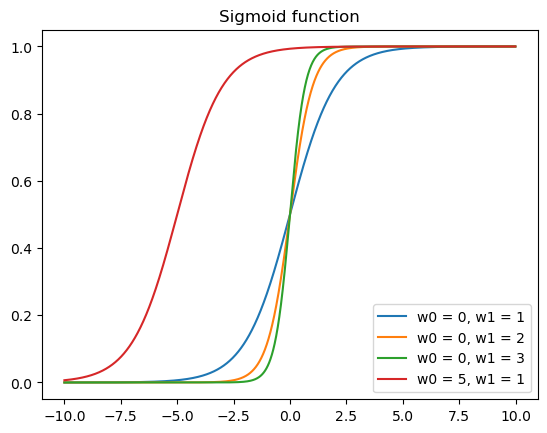

In [3]:
x = np.arange(-10, 10, 0.01)

def plot(w0, w1):
    p = 1 / (1 + np.exp(-(w0 + w1 * x)))
    label = "w0 = {}, w1 = {}".format(w0, w1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.title('Sigmoid function')
plt.show()

- First we created one-dimensional NumPy array called x, which contains evenly spaced values between -10 and 10, with a step size of 0.01.

- Next we defined a function named plot that takes two arguments, w0 and w1. It calculates the sigmoid function for the given values of w0 and w1 using the x array created earlier, and then plots the resulting curve using Matplotlib.

Question: What is controlled by parameters w0, w1?  



## Part 4: Implementing Logistic Regression for a Classification Problem

In this part, we will implement Logistic Regression for a binay classification problem.

More specifically, we will use the Titanic Dataset.

The Titanic dataset is a famous machine learning dataset that contains information about the passengers who were on board the Titanic when it sank on April 15, 1912. It contains information about the passengers, such as their age, gender, ticket class, cabin location, and whether or not they survived the disaster. The goal of the dataset is to predict whether a passenger survived or not based on the other available information.

### Loading Data

In [15]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,14.4542,C
1305,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,7.2250,C
1307,0,3,"Zakarian, Mr. Ortin",male,27.00,0,0,7.2250,C


The name of a passenger might not be important in the Titanic dataset because it is unlikely to have a direct impact on whether or not the passenger survived the disaster. Therefore, let's remove it

In [16]:
# Your task: drop the column "name"



In [21]:
# Your task: find and print the proportion of positive samples in data



% of positive samples in whole data: 0.3819709702062643


Now, let's split the data in training and test sets. However, to avoid bais and for better results, we will  keep the proportion of the positive (survived) class in both splits the same. 

This can be done by creating a STRATIFIED split.

In [22]:
from sklearn.model_selection import train_test_split

# split data, use **stratify** option to create splits with same proportion of survived cases
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                    test_size=0.2, stratify=data['survived'], random_state=42)

# find and print the proportion of positive samples in train and test sets, makeing sure they are approx same
print('% of positive samples in train set:', sum(y_train== 1) / len(x_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(x_test))

% of positive samples in train set: 0.38204393505253104
% of positive samples in test set: 0.3816793893129771


#### Data preprocessing

This part implements basic data processing (Handling Missing Values, Encoding Categorical Features, and Feature Scaling). Feel free to change things and compare results as a part of your practice.

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

Let's visualize the processed data

In [24]:
x_train

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.297101,0.000,0.000000,0.015127,0.0,1.0,0.0
1,0.5,0.297101,0.125,0.000000,0.054107,0.0,0.0,0.0
2,1.0,0.133927,0.500,0.222222,0.061045,0.0,0.0,1.0
3,1.0,0.309652,0.000,0.000000,0.014102,1.0,0.0,0.0
4,1.0,0.196686,0.000,0.000000,0.014932,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1042,1.0,0.585791,0.125,0.000000,0.013663,0.0,0.0,1.0
1043,1.0,0.020961,0.500,0.111111,0.077465,1.0,0.0,1.0
1044,1.0,0.209238,0.250,0.000000,0.015713,1.0,0.0,1.0
1045,0.5,0.234342,0.000,0.000000,0.020495,1.0,0.0,1.0


### Logistic Regression

- First, please carefully review the description of LogisticRegression class at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Then see the Logistic Regression in practice below. 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(random_state=42).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))

Testing accuracy = 0.8129770992366412
Testing precision = 0.7684210526315789
Testing recall = 0.73


## Part 3: Choosing an optimum threshold:

As we learned in the lecture that it is important to choose the right threshold to get optimum results from logistic regression.

In this part, we will implement the thresholding procedure to select the optimum threshold for our classifier. 

Please note that in order to find the optimum threshold, instead of predicting the class labels, we will predict class probabilities using the <span style="color:blue"> predict_proba </span> function.


Below, you have an example of a simple (simulated) binary classification problem having 1000 samples points and 2 features. A logistic regression model is fitted to the data and then thresholding is performed for this model using the ROC curve as your learned in the guided practice 1. 

<span style="color:blue"> (1) Please carefully review the code below and analyze its output. (2) Complete the challenge activity. </span>

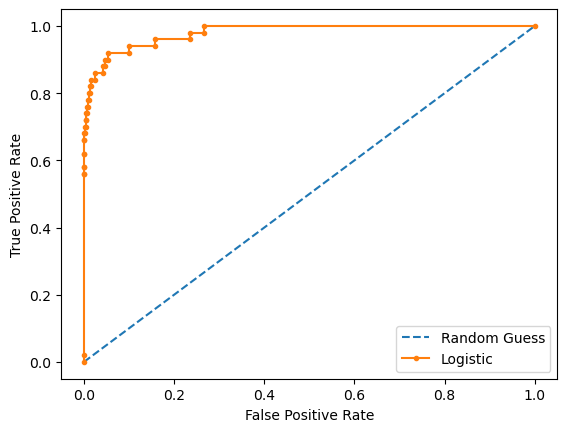

In [26]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Random Guess')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()

Given the ROC curver, we can select the optimum threshold using a well-known statistical measure called Youden’s J statistic. 

[Optional Reading] You can read about it at https://en.wikipedia.org/wiki/Youden%27s_J_statistic

The statistic is calculated as:

<span style="color:blue"> J = TruePositiveRate – FalsePositiveRate </span>

Youden’s J statistic has a value between 0 and 1. In a perfect test, it equals 1. Therefore, The optimum threshold is chosen to be the one with the largest J statistic value.

In [27]:
from numpy import argmax

J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.016153


## Challenge Activity:

Implement the above thresholding procedure for the logistic regression model that you trained on titanic data in Part 2 of this guided practice to select the optimum threshold for your model.

In [1]:
# write your code below

